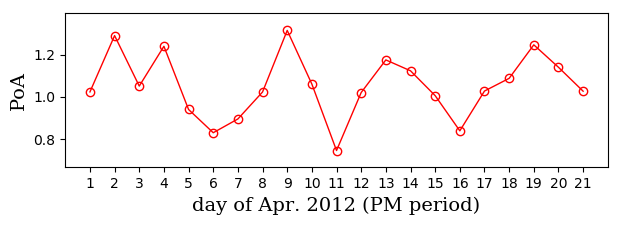

In [1]:
using JSON
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport parameters_julia

out_dir = parameters_julia.out_dir
month_w = parameters_julia.month_w
year = parameters_julia.year
files_ID = parameters_julia.files_ID

instance = "PM"
key = "(5, 1.5, 1000.0, 1)"

poaDict = readstring(out_dir * "PoA_Dict_" * month_w * "_" *instance * ".json");
poaDict = JSON.parse(poaDict);

poaDict_ = Dict{}()

for key in keys(poaDict)
    poaDict_[parse(Int, key)] = poaDict[key]
end


using PyPlot

week_day_Apr_list = parameters_julia.week_day_list
days = length(week_day_Apr_list)
day = 1:days

poa = map(day->poaDict_[day], day)

# plot(iterNum, objFun, "s-g", label="True")

fig = figure(figsize=(7,2))

plot(day, poa, "o-r", linewidth=1, markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)

# legend(loc="upper right",fancybox="true") 

# grid("on")

xlim(0, days+1)
xticks(1:1:days)
yticks(-0.2:0.2:2.4)
ylim(minimum(poa)-.08, maximum(poa)+.08)

font1 = Dict("family"=>"serif", "color"=>"k", "weight"=>"normal", "size"=>14)

xlabel("day of " * month_w * ". " * string(year) * " (" * instance * " period)", fontdict=font1)
ylabel("PoA", fontdict=font1)

# savefig("./results/POA_Apr_ext.pdf", dpi=300, bbox_inches="tight")

dire = out_dir

savefig(dire * "POA_" * month_w * "_" * instance * files_ID * ".pdf", dpi=300, bbox_inches="tight")


In [15]:
days

23